In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Additional imports
import seaborn as sns
from sklearn.model_selection import train_test_split

import math

In [51]:
import warnings
warnings.filterwarnings("ignore")

In [52]:
df_listings = pd.read_csv("data/listings_CPH.csv")
df_listings.drop(columns=["name","host_id", "neighbourhood_group","license","host_name","last_review"], inplace=True, axis=1)
df_listings.fillna({'reviews_per_month':0}, inplace=True)
df_listings

id              neighbourhood   latitude  longitude  \
0                    6983                    Nrrebro  55.686410  12.547410   
1                   26057                   Indre By  55.693070  12.576490   
2                   26473                   Indre By  55.676020  12.575400   
3                   29118  Vesterbro-Kongens Enghave  55.670230  12.555040   
4                   31094  Vesterbro-Kongens Enghave  55.666602  12.555283   
...                   ...                        ...        ...        ...   
13810  653494030951422457                    sterbro  55.732840  12.572370   
13811  647809303952891559                      Valby  55.667782  12.463285   
13812  650819220455514228                      Valby  55.659536  12.474726   
13813  658612163688161695               Brnshj-Husum  55.730971  12.487993   
13814  648436253362373119                 Bispebjerg  55.731420  12.521770   

             room_type  price  minimum_nights  number_of_reviews  \
0      Entire home/apt    898               3                172   
1      Entire home/apt   2600               4                 59   
2      Entire home/apt   3250               3                300   
3      Entire home/apt    725               7                 24   
4      Entire home/apt   1954               3                 19   
...                ...    ...             ...                ...   
13810  Entire home/apt   1250              14                  0   
13811  Entire home/apt    450               3                  3   
13812  Entire home/apt    400               1                  3   
13813  Entire home/apt    850               1                  0   
13814     Private room    420               2                  1   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   1.08                               1                 0   
1                   0.55                               1               303   
2                   2.06                               3                56   
3                   0.16                               1                59   
4                   0.13                               1                 0   
...                  ...                             ...               ...   
13810               0.00                               1                 0   
13811               1.01                               1                 0   
13812               1.27                               1                 0   
13813               0.00                               1                 0   
13814               0.37                               2                 0   

       number_of_reviews_ltm  
0                          4  
1                          8  
2                          7  
3                          2  
4                          2  
...                      ...  
13810                      0  
13811                      3  
13812                      3  
13813                      0  
13814                      1  

[13815 rows x 12 columns]

In [53]:
df_stops = pd.read_csv("data/stops.txt")
# We are only interested in longitude and latitude of the stops
df_stops = df_stops.drop(columns=["stop_id","stop_code","stop_desc","zone_id","stop_url","location_type","parent_station","stop_timezone","level_id","wheelchair_boarding","platform_code"], axis=1)
# Remove all rows that does not have (Metro) in its name
df_stops = df_stops[df_stops['stop_name'].str.contains('\(Metro\)')].reset_index()
display(df_stops)

index                   stop_name   stop_lon   stop_lat
0      51      Vestamager St. (Metro)  12.575297  55.619391
1      52         Ørestad St. (Metro)  12.579389  55.629055
2      53          Sundby St. (Metro)  12.585728  55.645199
3      54    Bella Center St. (Metro)  12.582928  55.638051
4      55  Islands Brygge St. (Metro)  12.585217  55.663422
..    ...                         ...        ...        ...
73  61853    Marmorkirken St. (Metro)  12.588632  55.685245
74  61854   Gammel Strand St. (Metro)  12.579575  55.677749
75  61855   Rådhuspladsen St. (Metro)  12.568803  55.676373
76  62103        Nordhavn St. (Metro)  12.591834  55.707298
77  62227       Orientkaj St. (Metro)  12.595272  55.711612

[78 rows x 4 columns]

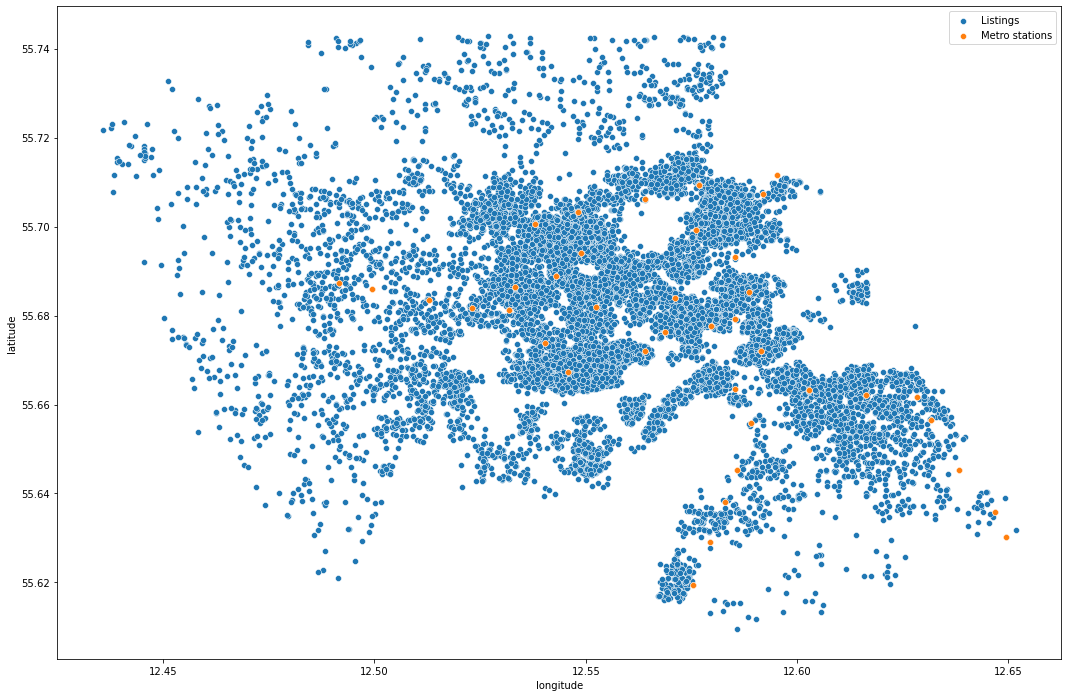

In [54]:
# Display all stations together with our listings
plt.figure(figsize=(18,12))
sns.scatterplot(data=df_listings, x="longitude", y="latitude", palette="Set2")
sns.scatterplot(data=df_stops, x="stop_lon", y="stop_lat", palette="Set2")
plt.legend(["Listings", "Metro stations"])
plt.show()

(The plot below does not show in github)

In [55]:
import plotly.express as px
import plotly.io as pio
import plotly.offline as pyo
# Set notebook mode to work in offline
pyo.init_notebook_mode()

In [56]:
api_token = "pk.eyJ1IjoiYmFybGF1ZyIsImEiOiJjbGE2czJqNGcwazJuM3dxenhucXAxb3E1In0.--v3HQgnOhI_fjUHxq0csg"

In [57]:
df = df_listings[["latitude", "longitude"]]
color1 = np.ones(len(df))
df_stops = df_stops.rename({"stop_lon": "longitude", "stop_lat": "latitude"}, axis=1)
color2 = np.zeros(len(df_stops))
df = df.append(df_stops)
color = np.concatenate((color1, color2))
df["color"] = np.concatenate((color1, color2))

fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", width=1100, height=800, color="color")
fig.update_layout(font_size=16,  title={'xanchor': 'center','yanchor': 'top', 'y':0.1, 'x':0.1,}, 
        title_font_size = 24, mapbox_accesstoken=api_token)#, mapbox_style = "mapbox://styles/strym/ckhd00st61aum19noz9h8y8kw")
fig.update_traces(marker=dict(size=6))            
fig.show()

We therefore display it here

![alt text](newplot.png "Scatter of listings and metro stations")

In [58]:
def distance(origin, destination):
    """
    Calculate the Haversine distance. From: https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [59]:
# For all listings, find distance to all metrostops, choose smallest one as "distance to metro"
metro_locations = [(df_stops["latitude"][i], df_stops["longitude"][i]) for i in range(0, len(df_stops["longitude"]))]
listing_locations = [(df_listings["latitude"][i], df_listings["longitude"][i]) for i in range(0, len(df_listings["longitude"]))]

min_distances = []
for list_loc in listing_locations:
    smallest_dist = math.inf
    for metro_loc in metro_locations:
        dist = distance(list_loc, metro_loc)
        if dist < smallest_dist:
            smallest_dist = dist
    min_distances.append(smallest_dist)

min_distances = np.array(min_distances).T
df_listings["distance to metro"] = min_distances

In [60]:
display(df_listings)

id              neighbourhood   latitude  longitude  \
0                    6983                    Nrrebro  55.686410  12.547410   
1                   26057                   Indre By  55.693070  12.576490   
2                   26473                   Indre By  55.676020  12.575400   
3                   29118  Vesterbro-Kongens Enghave  55.670230  12.555040   
4                   31094  Vesterbro-Kongens Enghave  55.666602  12.555283   
...                   ...                        ...        ...        ...   
13810  653494030951422457                    sterbro  55.732840  12.572370   
13811  647809303952891559                      Valby  55.667782  12.463285   
13812  650819220455514228                      Valby  55.659536  12.474726   
13813  658612163688161695               Brnshj-Husum  55.730971  12.487993   
13814  648436253362373119                 Bispebjerg  55.731420  12.521770   

             room_type  price  minimum_nights  number_of_reviews  \
0      Entire home/apt    898               3                172   
1      Entire home/apt   2600               4                 59   
2      Entire home/apt   3250               3                300   
3      Entire home/apt    725               7                 24   
4      Entire home/apt   1954               3                 19   
...                ...    ...             ...                ...   
13810  Entire home/apt   1250              14                  0   
13811  Entire home/apt    450               3                  3   
13812  Entire home/apt    400               1                  3   
13813  Entire home/apt    850               1                  0   
13814     Private room    420               2                  1   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   1.08                               1                 0   
1                   0.55                               1               303   
2                   2.06                               3                56   
3                   0.16                               1                59   
4                   0.13                               1                 0   
...                  ...                             ...               ...   
13810               0.00                               1                 0   
13811               1.01                               1                 0   
13812               1.27                               1                 0   
13813               0.00                               1                 0   
13814               0.37                               2                 0   

       number_of_reviews_ltm  distance to metro  
0                          4           0.388005  
1                          8           0.555621  
2                          7           0.324793  
3                          2           0.600311  
4                          2           0.598658  
...                      ...                ...  
13810                      0           2.637089  
13811                      3           2.806269  
13812                      3           3.264583  
13813                      0           4.613479  
13814                      1           3.540940  

[13815 rows x 13 columns]

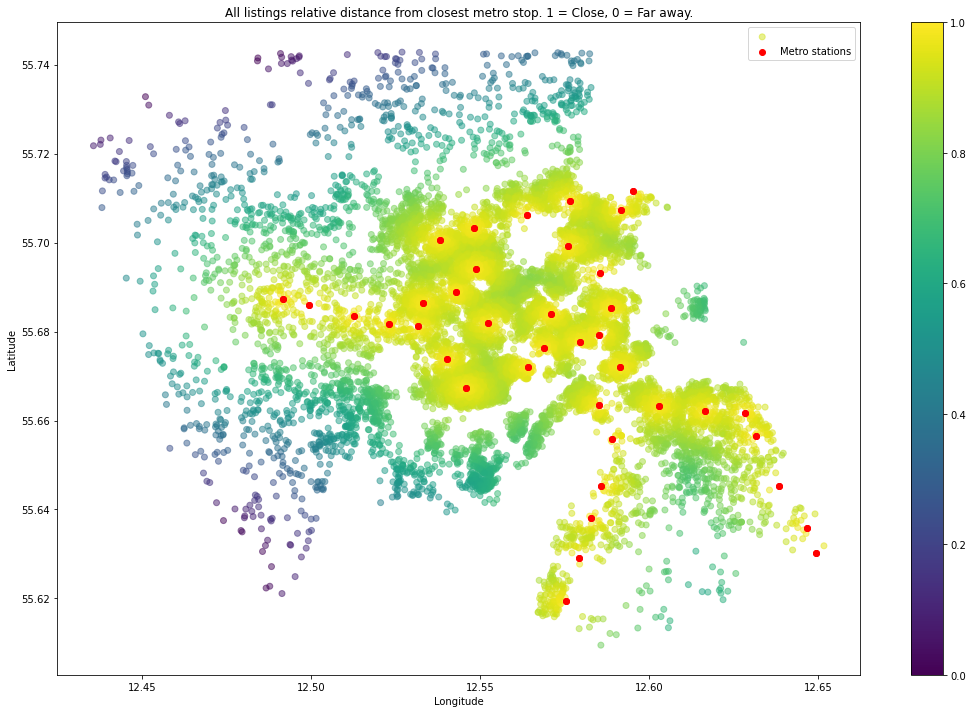

In [61]:
# Display all stations together with our listings
local_color = 1 - df_listings["distance to metro"]
plt.figure(figsize=(18,12))
plt.scatter(df_listings["longitude"], df_listings["latitude"], c=local_color, alpha=0.5)
plt.scatter(df_stops["longitude"], df_stops["latitude"],color = '#FF0000')
#sns.scatterplot(data=df_listings, x="longitude", y="latitude", palette="Set2", hue_norm="distance to metro")
#sns.scatterplot(data=df_stops, x="longitude", y="latitude", palette="Set2")
plt.colorbar()
plt.legend(["", "Metro stations"])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("All listings relative distance from closest metro stop. 1 = Close, 0 = Far away.")
plt.show()

In [62]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

longitude   latitude  distance to metro
0      12.547410  55.686410           0.067228
1      12.576490  55.693070           0.096866
2      12.575400  55.676020           0.056051
3      12.555040  55.670230           0.104768
4      12.555283  55.666602           0.104475
...          ...        ...                ...
13810  12.572370  55.732840           0.464910
13811  12.463285  55.667782           0.494824
13812  12.474726  55.659536           0.575863
13813  12.487993  55.730971           0.814374
13814  12.521770  55.731420           0.624728

[13815 rows x 3 columns]

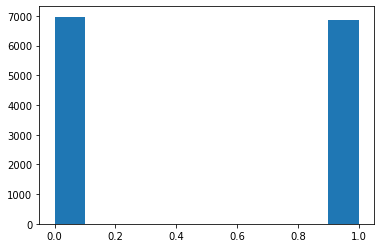

In [63]:
# Can we predict if the price will be high or low with only latitude, longitude and distance to metro?

threshold = df_listings["price"].median()

X = df_listings[["longitude", "latitude", "distance to metro"]]
y = [1 if y_i > threshold else 0 for y_i in df_listings["price"]]
plt.hist(y)

# Normalize the distance column
X["distance to metro"] = (X["distance to metro"] - X["distance to metro"].min()) / (X["distance to metro"].max() - X["distance to metro"].min())
display(X)

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.33)
reg = LogisticRegression()
y_pred = reg.fit(x_train, y_train).predict(x_test)

Accuracy score: 0.5788550120640491
f1-score: 0.5428571428571429


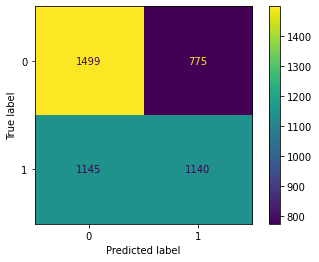

In [64]:
# EVALUATION:
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

acc = reg.score(x_test, y_test)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy score: {acc}\nf1-score: {f1}")

cm = confusion_matrix(y_test, y_pred)
cm_disp = ConfusionMatrixDisplay(cm)
cm_disp.plot()

In [65]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)

Accuracy score: 0.5788550120640491
f1-score: 0.5916499218575575


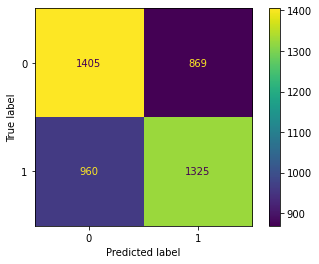

In [66]:
acc = reg.score(x_test, y_test)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy score: {acc}\nf1-score: {f1}")

cm = confusion_matrix(y_test, y_pred)
cm_disp = ConfusionMatrixDisplay(cm)
cm_disp.plot()

In [67]:
# KNN:
from sklearn.neighbors import KNeighborsClassifier

K = 5
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

Accuracy score: 0.5788550120640491
f1-score: 0.5917869034406215


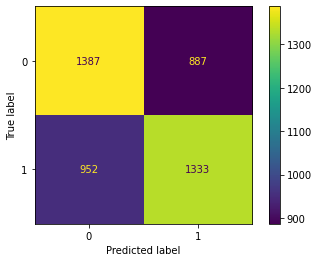

In [68]:
acc = reg.score(x_test, y_test)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy score: {acc}\nf1-score: {f1}")

cm = confusion_matrix(y_test, y_pred)
cm_disp = ConfusionMatrixDisplay(cm)
cm_disp.plot()

In [69]:
# try with neural net
from keras.models import Sequential
from keras.layers import Dense, Dropout

n_features = 3
n_outputs = 1

model = Sequential()
model.add(Dense(20, input_dim=n_features, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(3, activation='relu'))
model.add(Dense(n_outputs, activation='sigmoid'))

y_train_ = pd.DataFrame(y_train)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train_, epochs=50, batch_size=128)

Epoch 1/50
73/73 [==============================] - 1s 1ms/step - loss: 4.8016 - accuracy: 0.4954
Epoch 2/50
73/73 [==============================] - 0s 1ms/step - loss: 1.6266 - accuracy: 0.4961
Epoch 3/50
73/73 [==============================] - 0s 2ms/step - loss: 1.0488 - accuracy: 0.5082
Epoch 4/50
73/73 [==============================] - 0s 2ms/step - loss: 0.8787 - accuracy: 0.5027
Epoch 5/50
73/73 [==============================] - 0s 2ms/step - loss: 0.7996 - accuracy: 0.5032
Epoch 6/50
73/73 [==============================] - 0s 2ms/step - loss: 0.7685 - accuracy: 0.5064
Epoch 7/50
73/73 [==============================] - 0s 2ms/step - loss: 0.7435 - accuracy: 0.4983
Epoch 8/50
73/73 [==============================] - 0s 2ms/step - loss: 0.7308 - accuracy: 0.5104
Epoch 9/50
73/73 [==============================] - 0s 1ms/step - loss: 0.7190 - accuracy: 0.5105
Epoch 10/50
73/73 [==============================] - 0s 1ms/step - loss: 0.7108 - accuracy: 0.5001
Epoch 11/50
73/73 [

In [70]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int) #make y_pred binary with ones and zeros based on the truth condition (y_pred > 0.5)

Accuracy score: 0.5788550120640491
f1-score: 0.0


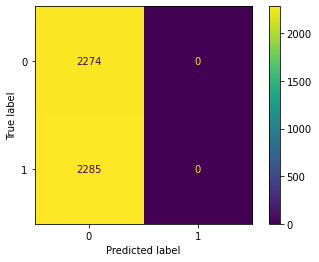

In [71]:
f1 = f1_score(y_test, y_pred)
print(f"Accuracy score: {acc}\nf1-score: {f1}")

cm = confusion_matrix(y_test, y_pred)
cm_disp = ConfusionMatrixDisplay(cm)
cm_disp.plot()

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, -1}


Text(0, 0.5, 'Latitude')

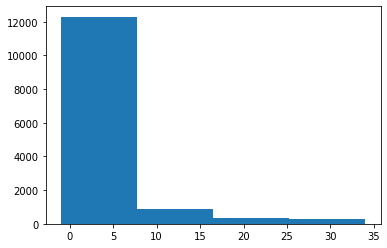

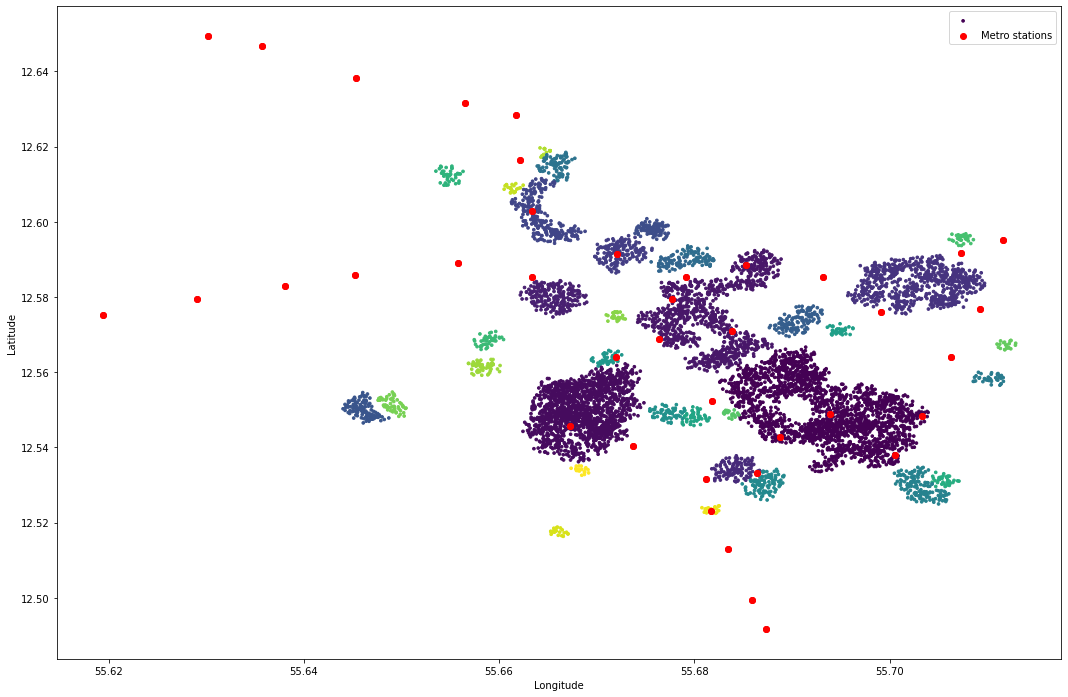

In [99]:
# DBSCAN:
from sklearn.cluster import DBSCAN

points = [[df_listings["latitude"][i], df_listings["longitude"][i]] for i in range(0, len(df_listings["longitude"]))]

dbs=DBSCAN(eps=0.001, min_samples=20, algorithm='ball_tree', metric='haversine') #Hvis kjører tregt, sett ned eps eller opp min_samples
dbs.fit(points) #points are two dimentional

dbs.components_ #datapoints that are not outliers, nice to check how many outliers (len(data)-len(components))
dbs.labels_ #list of lebels (clusters), the same shape as points, -1 for outlier
print(set(dbs.labels_)) # set of all clusters
plt.hist(dbs.labels_, bins=4) # easy plot to see how many datapoints in different clusters

#plot it:
x_=[]
y_=[]
c_=[]
for label, x, y in zip(dbs.labels_, df_listings["latitude"], df_listings["longitude"]):
    if label==-1:
       continue # or do something else, might want to display the noise also
    x_.append(x)
    y_.append(y)
    c_.append(label)

plt.figure(figsize=(18, 12))
plt.scatter(x_,y_,s=7,c=c_, label=c_)
plt.scatter(df_stops["latitude"], df_stops["longitude"],color = '#FF0000')
plt.legend(["", "Metro stations"])
plt.xlabel("Longitude")
plt.ylabel("Latitude")